In [1]:
#QFT for 4 qubits
import numpy as np
from numpy import pi
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
def qft_rotations(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n): 
        circuit.cp(pi/2**(n-qubit), qubit, n)
    qft_rotations(circuit, n)   
        
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

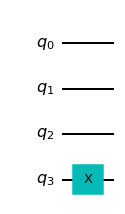

In [4]:
qc = QuantumCircuit(4) #Four qubit quantum circuit
qc.x(3) #Giving input as 4 which is '1000'
qc.draw(output='mpl')

/home/vikasrajput/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


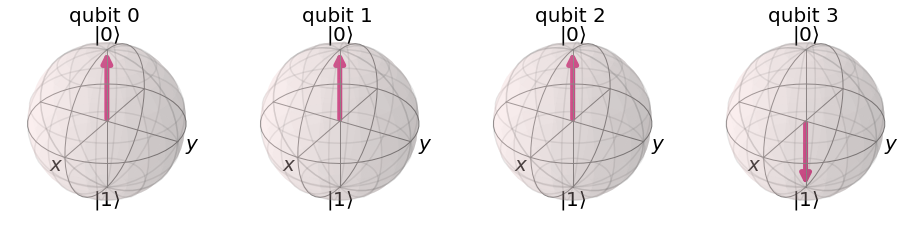

In [5]:
#Choosing statevector simulator for simulation

sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)

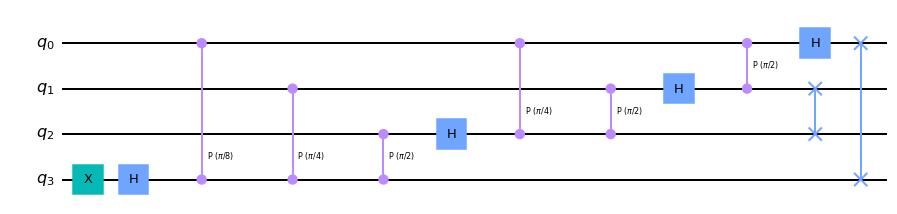

In [6]:
#Application of QFT function for three qubits
qft(qc,4)
qc.draw(output='mpl')

In [7]:
#Print results
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
print(statevector)

[ 0.25-3.061617e-17j -0.25+3.061617e-17j  0.25-3.061617e-17j
 -0.25+3.061617e-17j  0.25-3.061617e-17j -0.25+3.061617e-17j
  0.25-3.061617e-17j -0.25+3.061617e-17j  0.25-3.061617e-17j
 -0.25+3.061617e-17j  0.25-3.061617e-17j -0.25+3.061617e-17j
  0.25-3.061617e-17j -0.25+3.061617e-17j  0.25-3.061617e-17j
 -0.25+3.061617e-17j]


/home/vikasrajput/.local/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


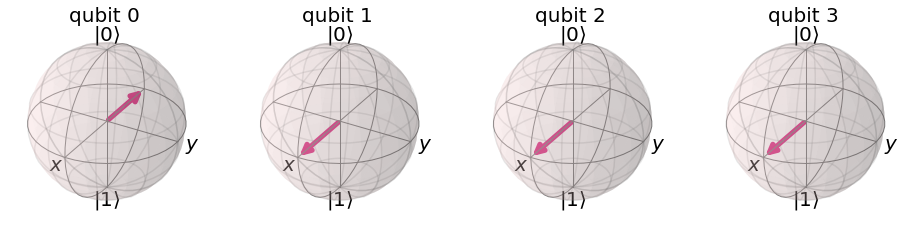

In [8]:
#Draw results of QFT
plot_bloch_multivector(statevector)

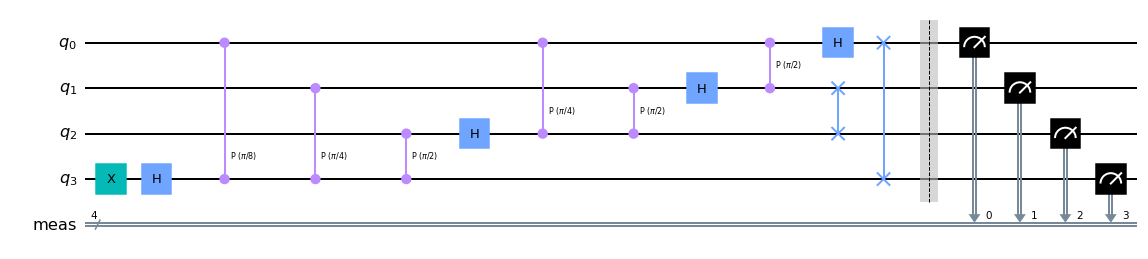

In [9]:
#Measuring th qubit output
qc.measure_all()
qc.draw(output='mpl')

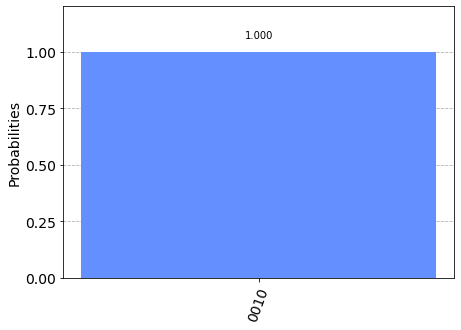

In [10]:
#Plot histogram of the result
qobj2 = assemble(qc)
sv_backend = Aer.get_backend('statevector_simulator')
sv_result = sv_sim.run(qobj2).result()
counts = sv_result.get_counts()
plot_histogram(counts)

Job Status: job has successfully run


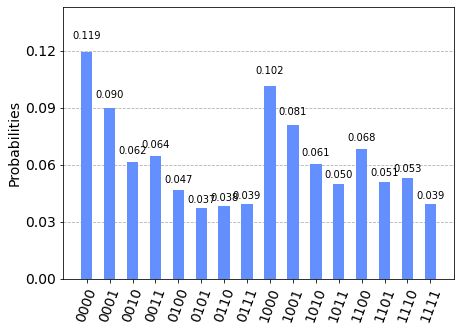

In [11]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend=qcomp)
job_monitor(job)
job_result = job.result()
plot_histogram(job_result.get_counts(qc))  #ran at 15:55 on 16/05/2021

<ipython-input-12-e5619adc7650>:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = qcomp.run(qobj_t)


Job Status: job has successfully run


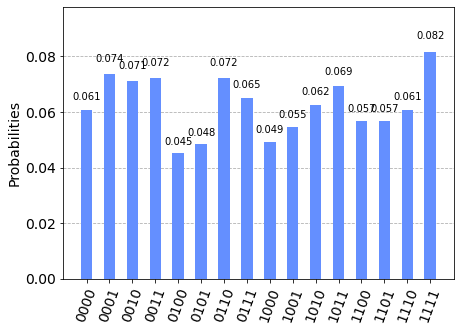

In [12]:
#Result for 2048 shots
shots = 2048
transpiled_qc = transpile(qc, backend=qcomp, optimization_level=3)
qobj_t = assemble(transpiled_qc, shots=shots)
job = qcomp.run(qobj_t)
job_monitor(job)
counts = job.result().get_counts()
plot_histogram(counts)   #ran at 16:00 on 16/05/2021

In [13]:
qcomp.properties().last_update_date #Last Calibration time of selected quantum computer which is ibmq_16_melbourne

datetime.datetime(2021, 5, 16, 12, 3, 54, tzinfo=tzlocal())